# Pandas library overview

The Pandas library is build on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language

In [240]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Pandas Data structures

## Series

A one-dimensional labeled array capable of holding any data type

Creation:

In [241]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
print(s)

a    3
b   -5
c    7
d    4
dtype: int64


In [242]:
s = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e']) 
print(s) 

a    1.013752
b   -2.485766
c    0.718099
d    2.871209
e    0.519813
dtype: float64


Indexing:

In [243]:
s['b'] # get one element

-2.4857657866594134

In [244]:
print(s.b == s['b'])

True


Series can contain missing values

In [245]:
s.c = np.nan

In [246]:
print(s)

a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64


Smart indexing

In [247]:
print('Second element of s is', s[1], '\n')
print(s[:3], '\n')
print('There are', len(s[s > 0]), 'positive elements in s\n')

Second element of s is -2.4857657866594134 

a    1.013752
b   -2.485766
c         NaN
dtype: float64 

There are 3 positive elements in s



Series objects can be the arguments for Numpy functions

In [248]:
print(np.exp(s))

a     2.755921
b     0.083262
c          NaN
d    17.658358
e     1.681713
dtype: float64


Dropping

In [249]:
s.drop(['a', 'c'])

b   -2.485766
d    2.871209
e    0.519813
dtype: float64

Data Alignment

In [250]:
s3 = pd.Series([7, -2, 3], index=['a', 'b', 'd'])
print(s)
s + s3

a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64


a    8.013752
b   -4.485766
c         NaN
d    5.871209
e         NaN
dtype: float64

Arithmetic operations with Fill Methods

You can also do the interlnal data alignment yourself with the help of the fill methods:

In [251]:
s.add(s3, fill_value=0)

a    8.013752
b   -4.485766
c         NaN
d    5.871209
e    0.519813
dtype: float64

In [252]:
print(s)
print(s3)
s.sub(s3, fill_value=2)

a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64
a    7
b   -2
d    3
dtype: int64


a   -5.986248
b   -0.485766
c         NaN
d   -0.128791
e   -1.480187
dtype: float64

In [253]:
print(s)
print(s3)
s.div(s3, fill_value=4)

a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64
a    7
b   -2
d    3
dtype: int64


a    0.144822
b    1.242883
c         NaN
d    0.957070
e    0.129953
dtype: float64

In [254]:
print(s)
print(s3)
s.mul(s3, fill_value=3)
print(s)

a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64
a    7
b   -2
d    3
dtype: int64
a    1.013752
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64


In [255]:
# Series s where value is not > 1 s where value is < -1 or > 2
s[~(s > 1)]

b   -2.485766
c         NaN
e    0.519813
dtype: float64

In [256]:
s[(s < -1) | (s > 2)]

b   -2.485766
d    2.871209
dtype: float64

In [257]:
# setting
s['a'] = 6
s

a    6.000000
b   -2.485766
c         NaN
d    2.871209
e    0.519813
dtype: float64

## DataFrame

A two-dimensional labeled data structure with columns of potentially different types

Creation:

In [258]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}

In [259]:
df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [260]:
# form numpy array
df1 = pd.DataFrame(np.random.randn(5, 3),
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,0.732200,-1.172857,-0.840089
o2,-0.313555,-0.859333,0.761631
o3,-0.711657,0.264890,2.199549
o4,-0.694947,0.176298,-0.939214
o5,0.137396,2.025663,0.549143


In [261]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.878893,a,False
1,0.011891,b,False
2,0.482364,c,False
3,0.628309,d,True
4,0.985283,e,True


Selection

In [262]:
print('The element in postion 3, B is', df2.at[3, 'B'], '\n')

The element in postion 3, B is d 



In [263]:
print(df2.loc[[1, 4], ['A', 'B']])

          A  B
1  0.011891  b
4  0.985283  e


In [264]:
# getting
df[1:]

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [265]:
# select single value by row & column by position
df.iloc[[0], [0]]

,Country
0,Belgium


In [266]:
# select single value by row & columns labes
df.loc[[0], ['Country']]

,Country
0,Belgium


In [267]:
# select single row of subset of rows
df.ix[2]

Country          Brazil
Capital       Brasília
Population    207847528
Name: 2, dtype: object

In [268]:
df.ix[:, 'Capital']

0     Brussels
1    New Delhi
2    Brasília
Name: Capital, dtype: object

In [269]:
# select rows and columns
df.ix[1, 'Capital']

'New Delhi'

In [270]:
# use filter to adjust DataFrame
df[df['Population'] > 120000000]

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [271]:
# dropping
df.drop('Country', axis=1)

,Capital,Population
0,Brussels,11190846
1,New Delhi,1303171035
2,Brasília,207847528


Sort & Rank

In [272]:
# sort by labels along an axis
df.sort_index()

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [273]:
# sort by the values along an axis
df.sort_values(by='Population')

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035


In [274]:
# assign ranks to entries
df.rank()

,Country,Capital,Population
0,1.0,2.0,1.0
1,3.0,3.0,3.0
2,2.0,1.0,2.0


Retrieving Series/DataFrame Information

Basic information

In [275]:
# (rows, columns)
df.shape

(3, 3)

In [276]:
# describe index
df.index

RangeIndex(start=0, stop=3, step=1)

In [277]:
# describe DataFrame columns
df.columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [278]:
# info on DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Country       3 non-null object
Capital       3 non-null object
Population    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [279]:
# number of non-NA values
df.count()

Country       3
Capital       3
Population    3
dtype: int64

summary

In [280]:
# sum of values
df.sum()

Country               BelgiumIndiaBrazil
Capital       BrusselsNew DelhiBrasília
Population                    1522209409
dtype: object

In [281]:
# cummulative sum of values
df.cumsum()

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,BelgiumIndia,BrusselsNew Delhi,1314361881
2,BelgiumIndiaBrazil,BrusselsNew DelhiBrasília,1522209409


In [282]:
# minimum/maximum values df.min() / df.max()
df.min()

Country         Belgium
Capital       Brasília
Population     11190846
dtype: object

In [283]:
# minimum/maximum index value df.idxmin()/df.idxmax()

In [284]:
# summary statictics
df.describe()

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [285]:
# mean of values
df.mean()

Population    5.074031e+08
dtype: float64

In [286]:
# median of values
df.median()

Population    207847528.0
dtype: float64

add/change new elements

In [287]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.878893,a,False
1,0.011891,b,False
2,0.482364,f,False
3,0.628309,d,True
4,0.985283,e,True


In [288]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.878893,a,False
1,0.011891,b,False
2,0.482364,f,False
3,0.628309,d,True
4,0.985283,e,True
5,3.141500,c,False


In [289]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.732200,-1.17286,-0.840089
o2,-0.313555,-0.859333,0.761631
o3,-0.711657,0.26489,2.199549
o4,-0.694947,0.176298,-0.939214
o5,0.137396,2.02566,0.549143
0,0.878893,a,0.000000
1,0.011891,b,0.000000
2,0.482364,f,0.000000
3,0.628309,d,1.000000
4,0.985283,e,1.000000


In [290]:
# missing values treatment
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan

In [291]:
df1

,A,B,C
o1,0.732200,-1.172857,-0.840089
o2,NaN,-0.859333,0.761631
o3,-0.711657,0.264890,2.199549
o4,-0.694947,0.176298,NaN
o5,0.137396,2.025663,0.549143


In [292]:
# boolean mask for missing values
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


In [293]:
# remove rows where at least one missing value exist
df1.dropna(how='any')

,A,B,C
o1,0.732200,-1.172857,-0.840089
o3,-0.711657,0.264890,2.199549
o5,0.137396,2.025663,0.549143


In [294]:
# fill missing values with value
df1.fillna(9999)

,A,B,C
o1,0.732200,-1.172857,-0.840089
o2,9999.000000,-0.859333,0.761631
o3,-0.711657,0.264890,2.199549
o4,-0.694947,0.176298,9999.000000
o5,0.137396,2.025663,0.549143


## Read from file

In [295]:
df = pd.read_csv('./data/pandas.csv', sep = ';')

In [296]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [297]:
df.head(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


In [298]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [299]:
df.sort_values(by=['wage'], ascending = False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


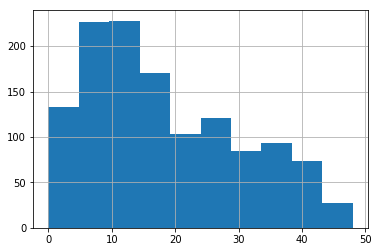

In [300]:
df['exper'].hist()

In [301]:
df['goodhlth'].mean()

0.9333333333333333

In [302]:
df[df['female'] > 0]['wage'].mean()

4.299357798165136

In [303]:
df[(df['female'] == 0) & (df['union'] > 0)  
   & (df['exper'] < 10)]['wage'].max()

12.82

In [304]:
df.loc[np.random.randint(df.shape[0], size = 5)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
115,5.66,11,1,1,0,1,0,1,16,4
801,10.58,15,1,1,0,0,1,0,12,4
456,4.72,3,0,0,0,1,0,0,12,3
445,6.75,42,0,0,0,0,1,0,13,3
155,3.85,13,1,1,0,1,1,1,17,3


In [305]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [306]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [307]:
g = df.groupby('looks') 
g.mean()

,wage,exper,union,goodhlth,black,female,married,service,educ
looks,,,,,,,,,
1,4.621538,27.000000,0.230769,0.846154,0.153846,0.384615,0.615385,0.307692,10.000000
2,5.328803,18.922535,0.232394,0.936620,0.035211,0.380282,0.711268,0.302817,12.105634
3,6.504598,19.491690,0.310249,0.921053,0.080332,0.322715,0.716066,0.254848,12.421053
4,6.299341,15.406593,0.219780,0.956044,0.074176,0.373626,0.651099,0.299451,13.074176
5,7.388421,11.631579,0.157895,1.000000,0.052632,0.421053,0.421053,0.263158,13.368421


In [308]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


In [309]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

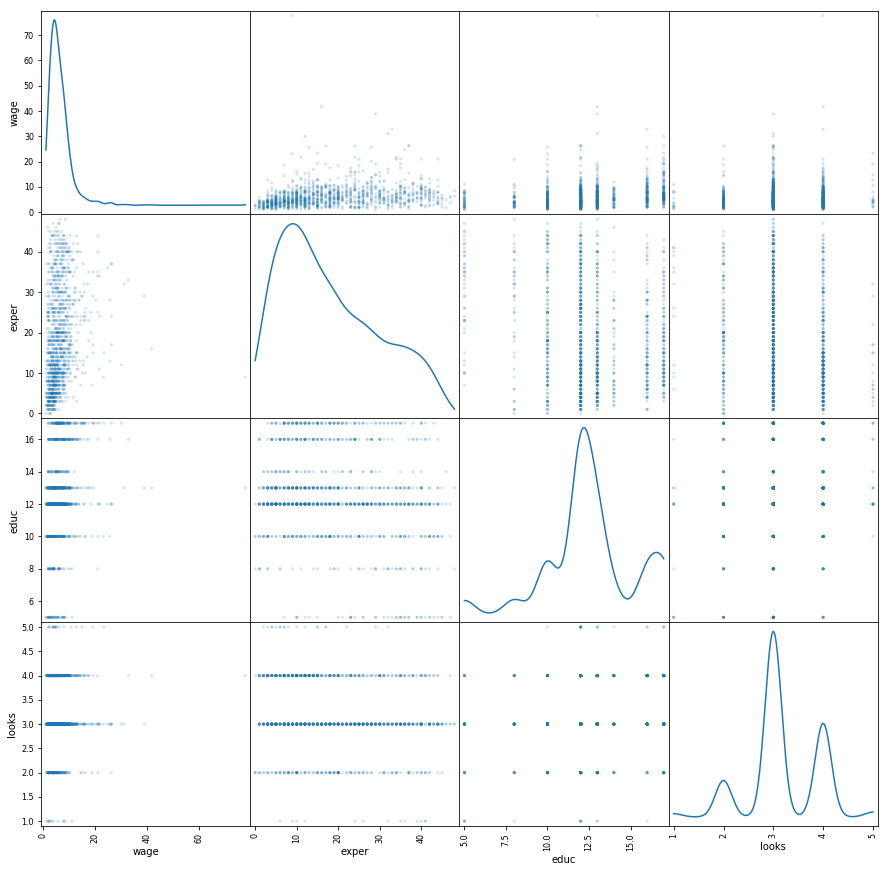

In [315]:
scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

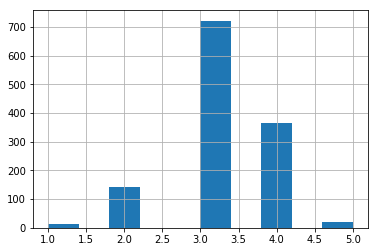

In [316]:
df['looks'].hist()
plt.show()

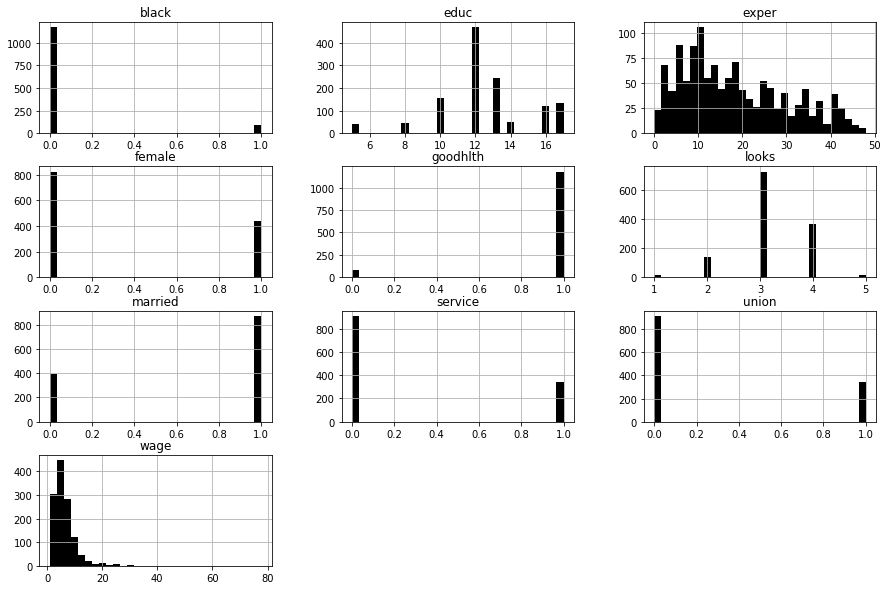

In [317]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

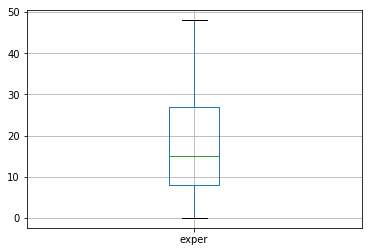

In [318]:
df.boxplot(column='exper')
plt.show()

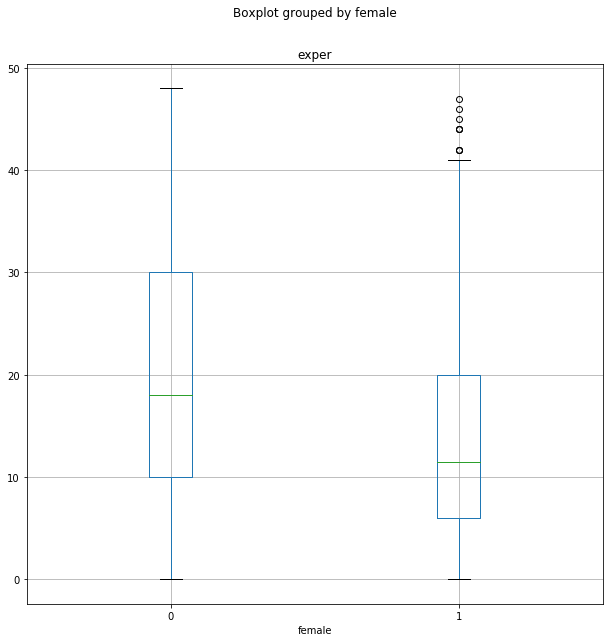

In [321]:
df.boxplot(column='exper',  by='female', figsize=(10,10))
plt.show()

### IO

In [322]:
pd.read_csv('./data/pandas.csv', header=None, nrows=5)
df.to_csv('myDataFrame.csv')

In [323]:
ls

data/            myDataFrame.csv  pandas.ipynb


In [325]:
# read and write to Excel
# pd.read_excel('file.xlsx')
# pd.to_excel('dir/myDataFrame.xlsx', sheet_name='Sheet1')
# read multiple sheets from the same file
# xlsx = pd.ExcelFile('file.xls')
# df = pd.read_excel(xlsx, 'Sheet1')

### Read and write to SQL query or Database table

In [326]:
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///:memory:')
# pd.read_sql("SELECT * FROM my_table;", engine)
# pd.read_sql_table('my_table', engine)
# pd.read_sql_query("SELECT * FROM my_table;", engine)
# read_sql()is a convenience wrapper around 
# read_sql_table() and read_sql_query()
# pd.to_sql('myDf', engine)

### applying functions

In [335]:
f = lambda x: x*2
# apply function
df.apply(f)
# apply function element-wise
df.applymap(f).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,11.46,60,0,2,0,2,2,2,28,8
1,8.56,56,0,2,0,2,2,0,24,6
2,15.92,70,0,2,0,2,0,0,20,8
3,23.14,76,0,2,0,0,2,2,32,6
4,22.84,54,0,2,0,0,2,0,32,6
